In [1]:
using Pkg
Pkg.activate(".")

  Activating environment at `~/Desktop/manning-liveprojects/hands-on-datascience-with-julia/data-pre-processing/Project.toml`


In [2]:
using Downloads
using SHA
using DataFrames
using CSV
using FreqTables
using Plots
using StatsBase
using Statistics
using Arrow

In [3]:
# Project constants
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
file_name = "./data/adult.data"
file_sha1 = UInt8[
    0xee, 0x86, 0xbb, 0xe5, 0x56,
    0x57, 0x8f, 0x70, 0x9a, 0xe0,
    0xfd, 0x00, 0x2a, 0xc5, 0x8a,
    0xc9, 0x37, 0x26, 0x48, 0x2f
];

In [6]:
# Create 'data' directory if it doesn't exist
data_dir = dirname(file_name)
if !isdir(data_dir)
    @info "Data directory: $data_dir does not exist. Creating..."
    mkpath(data_dir)
end

# Download Adult data if not exists
if isfile(file_name)
    @info "$file_name found. Skipping download."
else
    @info "$file_name not found. Fetching from source."
    Downloads.download(url, file_name)
end

┌ Info: ./data/adult.data found. Skipping download.
└ @ Main In[6]:10


In [7]:
# Check SHA1 of Adult file
if file_sha1 == open(sha1, file_name)
    @info "SHA1 check of $file_name passed."
else
    error("$file_name file has an invalid SHA1. Aborting!")
end

┌ Info: SHA1 check of ./data/adult.data passed.
└ @ Main In[7]:3


In [8]:
col_names = [
    :age, :workclass, :fnlwgt, :education, :education_num, :marital_status,
    :occupation, :relationship, :race, :sex, :capital_gain, :capital_loss,
    :hours_per_week, :native_country, :target,
];
adult_raw = CSV.read(file_name, DataFrame, header=col_names, delim=", ", missingstring="?")
adult = copy(adult_raw)
# Print up to 200 columns and 20 rows by default
ENV["COLUMNS"] = 200
ENV["LINES"] = 20;

In [9]:
select!(adult, Not(:fnlwgt))

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
,Int64,String31?,String15,Int64,String31,String31?,String15,String31,String7,Int64,Int64,Int64,String31?
1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
6,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
7,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
8,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
9,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States


In [10]:
describe(adult)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,age,38.5816,17,37.0,90,0,Int64
2,workclass,,Federal-gov,,Without-pay,1836,"Union{Missing, String31}"
3,education,,10th,,Some-college,0,String15
4,education_num,10.0807,1,10.0,16,0,Int64
5,marital_status,,Divorced,,Widowed,0,String31
6,occupation,,Adm-clerical,,Transport-moving,1843,"Union{Missing, String31}"
7,relationship,,Husband,,Wife,0,String15
8,race,,Amer-Indian-Eskimo,,White,0,String31
9,sex,,Female,,Male,0,String7


In [40]:
categorical = names(adult, Union{AbstractString, Missing})

9-element Vector{String}:
 "workclass"
 "education"
 "marital_status"
 "occupation"
 "relationship"
 "race"
 "sex"
 "native_country"
 "target"

In [41]:
for cat in categorical
    println("Category: $cat")
    println(freqtable(adult[!, cat]))
    println("-"^50)
end

Category: workclass
9-element Named Vector{Int64}
Dim1               │ 
───────────────────┼──────
"Federal-gov"      │   960
"Local-gov"        │  2093
"Never-worked"     │     7
"Private"          │ 22696
"Self-emp-inc"     │  1116
"Self-emp-not-inc" │  2541
"State-gov"        │  1298
"Without-pay"      │    14
missing            │  1836
--------------------------------------------------
Category: education
16-element Named Vector{Int64}
Dim1           │ 
───────────────┼──────
"10th"         │   933
"11th"         │  1175
"12th"         │   433
"1st-4th"      │   168
"5th-6th"      │   333
"7th-8th"      │   646
"9th"          │   514
"Assoc-acdm"   │  1067
"Assoc-voc"    │  1382
"Bachelors"    │  5355
"Doctorate"    │   413
"HS-grad"      │ 10501
"Masters"      │  1723
"Preschool"    │    51
"Prof-school"  │   576
"Some-college" │  7291
--------------------------------------------------
Category: marital_status
7-element Named Vector{Int64}
Dim1                    │ 
──────────────

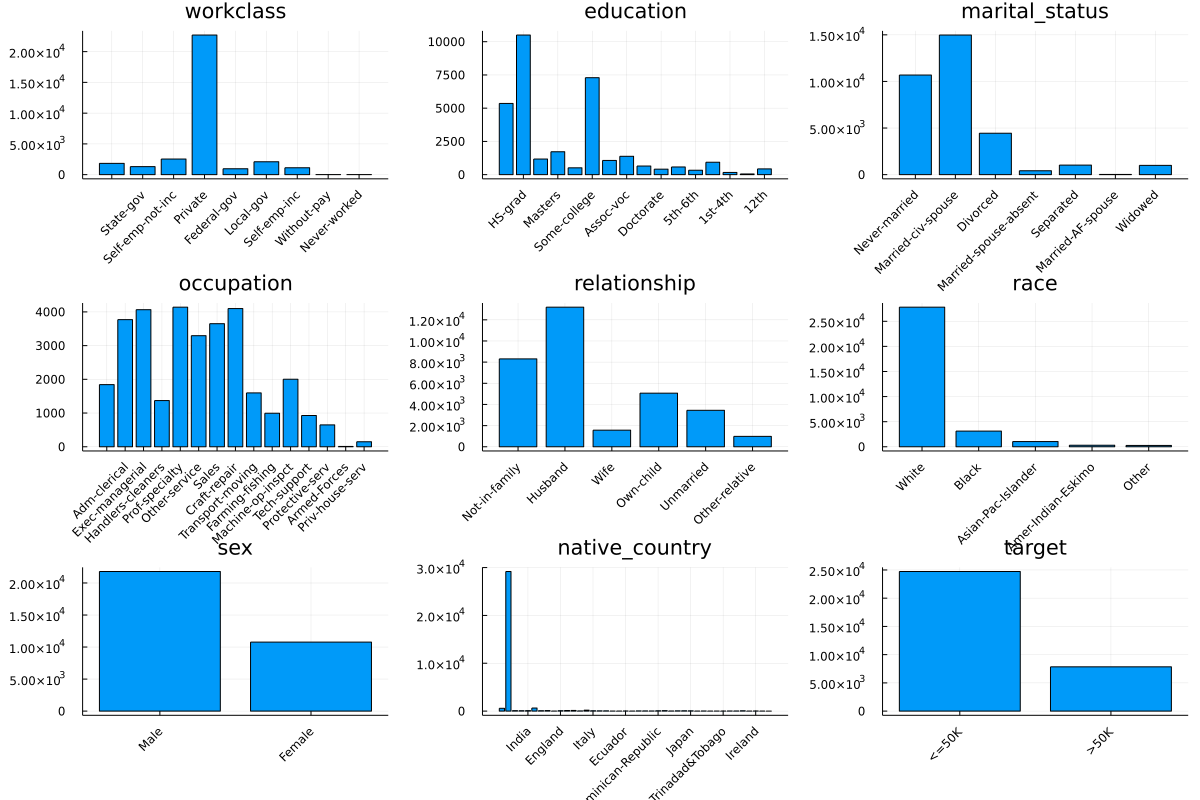

In [42]:
l = grid(3, 3)
plots = []
for cat in categorical
    df = combine(groupby(adult, cat), cat => length => :count)
    p = bar(df[!, cat], df[!, :count], title=cat, label=nothing, xrotation=45)
    push!(plots, p)
end
plot(plots..., layout=l, size=(1200, 800))

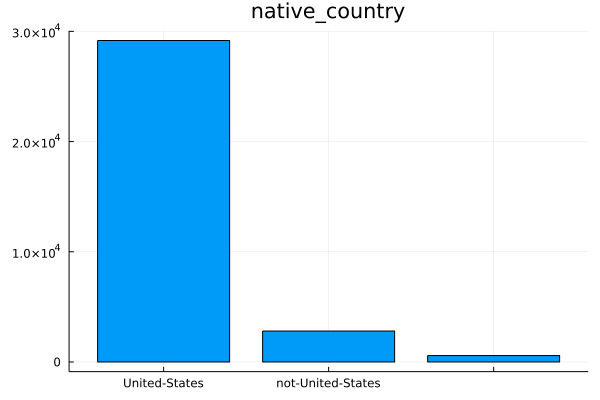

In [50]:
helper(c) = begin
    if c === missing
        return missing
    end
    return (c == "United-States") ? String31("United-States") : String31("not-United-States")
end
transform!(adult, :native_country => ByRow(helper) => :native_country)
tmp = combine(groupby(adult, :native_country), :native_country => length => :count)
bar(tmp[!, :native_country], tmp[!, :count], label=nothing, title="native_country")